In [4]:
import datetime as dt
import yfinance as yf
import pandas as pd

# stocks = ["AMZN","MSFT","FB","GOOG"]
stocks = ["AMZN","MSFT","META","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
# filling NaN values
cl_price.fillna(method='bfill',axis=0,inplace=True)

#dropping NaN values
cl_price.dropna(axis=0,how='any')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\serge\AppData\Local\Temp\ipykernel_30240\3441726042.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cl_price.fillna(method='bfill',axis=0,inplace=True)


,AMZN,MSFT,META,GOOG
Date,,,,
2014-08-19,16.756500,38.758018,75.135605,29.229397
2014-08-20,16.789000,38.433113,74.656578,29.111357
2014-08-21,16.645500,38.663963,74.417084,29.055573
2014-08-22,16.579500,38.604107,74.417084,29.015230
2014-08-25,16.701000,38.621201,74.866150,28.897686
...,...,...,...,...
2024-08-09,166.940002,405.289490,517.770020,165.389999
2024-08-12,166.800003,406.078064,515.950012,163.949997
2024-08-13,170.229996,413.265137,528.539978,165.929993


In [5]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","META","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

#familiarizing with data
cl_price.head(8) #prints the first 8 rows of the dataframe
cl_price.tail() #prints the last 5 rows of the dataframe
cl_price.describe() #performs summary statistic of each numerical columns in the datafrme

# Mean, Median, Standard Deviation
cl_price.mean() #calculates mean stock price for each stock
cl_price.median() #calculates median stock price for each stock
cl_price.std() #calculates standard deviation of stock price for each stock   

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


AMZN     52.940363
MSFT    117.185293
META    103.190697
GOOG     41.992671
dtype: float64

In [13]:
# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock 
daily_return = cl_price/cl_price.shift(1) - 1 #Performs same operation as above (current day/previous day - 1)

In [26]:
daily_return.mean(axis=1) #prints mean daily return for each stock (row mean)

Date
2014-08-19         NaN
2014-08-20   -0.004214
2014-08-21   -0.001916
2014-08-22   -0.001725
2014-08-25    0.002439
                ...   
2024-08-09    0.010144
2024-08-12   -0.002779
2024-08-13    0.018685
2024-08-14   -0.005188
2024-08-15    0.020740
Length: 2515, dtype: float64

In [37]:
daily_return.std() #prints standard deviation of daily returns for each stock (row std) https://en.wikipedia.org/wiki/Standard_deviation
# by default is uses , ddof=1, This means it divides by 𝑛 −1 n−1 instead of 𝑛 n, where 𝑛 n is the number of observations

AMZN    0.020625
MSFT    0.017091
META    0.023647
GOOG    0.017797
dtype: float64

In [45]:
# Rolling operations (simple)
daily_return.rolling(window=10).mean()
daily_return.rolling(window=10).std()
daily_return.rolling(window=10).max() # min_periods == window here 
daily_return.rolling(window=10, min_periods=2).sum()

,AMZN,MSFT,META,GOOG
Date,,,,
2014-08-19,NaN,NaN,NaN,NaN
2014-08-20,NaN,NaN,NaN,NaN
2014-08-21,-0.006608,-0.002376,-0.009584,-0.005955
2014-08-22,-0.010573,-0.003924,-0.009584,-0.007343
2014-08-25,-0.003244,-0.003481,-0.003549,-0.011394
...,...,...,...,...
2024-08-09,-0.083352,-0.045293,0.109740,-0.017944
2024-08-12,-0.088027,-0.046780,0.106203,-0.041175
2024-08-13,-0.059330,-0.020153,0.136016,-0.033364


In [43]:
# Rolling operations (exponentialy weighted)
# https://chatgpt.com/c/75d4d924-0017-4536-9a4d-2985d0ff9b6d
daily_return.ewm(com=10, min_periods=10).mean()

,AMZN,MSFT,META,GOOG
Date,,,,
2014-08-19,NaN,NaN,NaN,NaN
2014-08-20,NaN,NaN,NaN,NaN
2014-08-21,NaN,NaN,NaN,NaN
2014-08-22,NaN,NaN,NaN,NaN
2014-08-25,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-08-09,-0.005227,-0.003324,0.005980,-0.003316
2024-08-12,-0.004828,-0.002845,0.005117,-0.003806
2024-08-13,-0.002520,-0.000978,0.006870,-0.002362


In [44]:
daily_return.ewm(com=10, min_periods=10).std()

,AMZN,MSFT,META,GOOG
Date,,,,
2014-08-19,NaN,NaN,NaN,NaN
2014-08-20,NaN,NaN,NaN,NaN
2014-08-21,NaN,NaN,NaN,NaN
2014-08-22,NaN,NaN,NaN,NaN
2014-08-25,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-08-09,0.027270,0.015007,0.028156,0.019464
2024-08-12,0.026033,0.014392,0.026991,0.018626
2024-08-13,0.025924,0.014998,0.026355,0.018366


array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

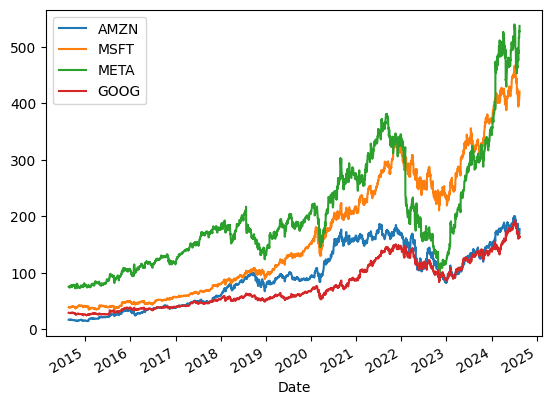

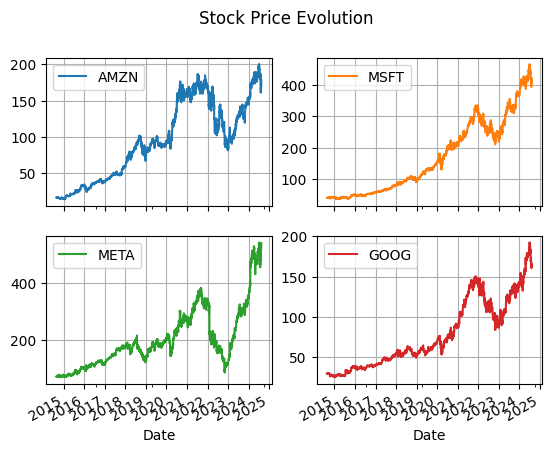

In [49]:
#plotting close prices
cl_price.plot() 
cl_price.plot(subplots=True, layout = (2,2), title = "Stock Price Evolution", grid =True) # Subplots of the stocks

<Axes: title={'center': 'Stock Price Evolution'}, xlabel='Date'>

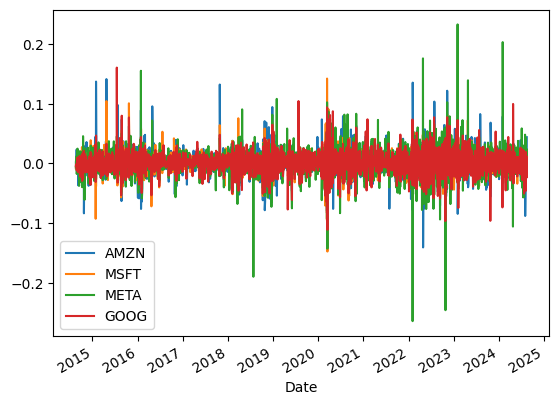

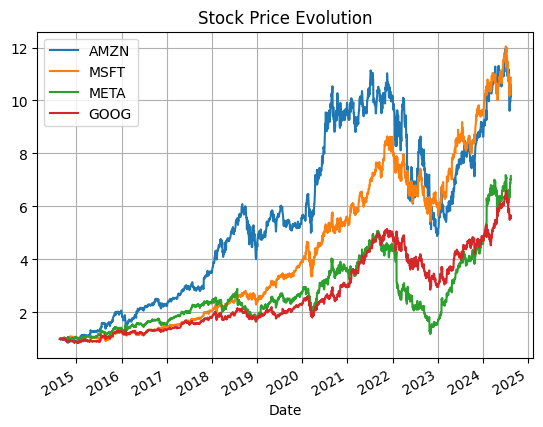

In [53]:
#plotting daily returns and cumulative returns    
daily_return.plot()
(1+daily_return).cumprod().plot(title = "Stock Price Evolution", grid =True)    

<BarContainer object of 4 artists>

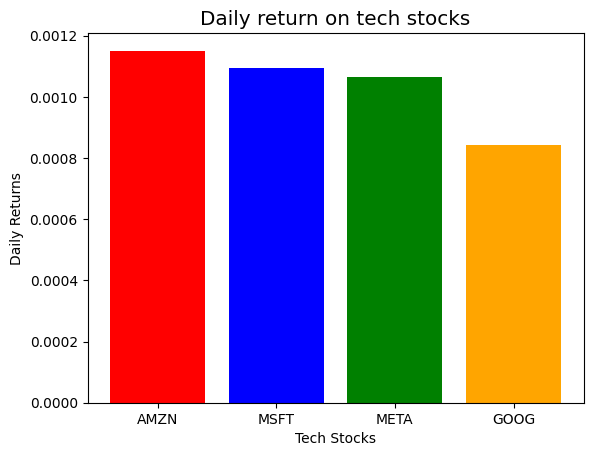

In [61]:
import matplotlib.pyplot as plt

# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on tech stocks", xlabel="Tech Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean(),color=["red","blue","green","orange"])

In [62]:
plt.style.available # get list of available styles

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']